<a href="https://colab.research.google.com/github/lcbjrrr/ProgWdata/blob/main/CSC116_2_Agg_Bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

Data analysis with Python is a powerful way to uncover insights from data using libraries like pandas and matplotlib. With Python, you can clean and transform raw datasets, explore statistical patterns, and create visualizations that make trends easier to understand. Its simplicity and flexibility make it one of the most popular tools for analysts, enabling everything from quick exploratory analysis to advanced machine learning applications.

## Data Manipulation

CSV (Comma-Separated Values) files are plain text files used to store tabular data, making them a common choice for sharing and analyzing datasets. In Python, the pandas library provides the read_csv() function to efficiently load data from a CSV file into a DataFrame for further manipulation and analysis. Once the data is loaded, the head() method displays the first few rows, while the tail() method shows the last few, allowing quick inspection of data samples to verify contents and structure before deeper analysis

In [2]:
import pandas as pd
grades = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ProgWdata/refs/heads/main/grades_final.csv')
grades

,Course,Student,AP1,AP2,AP3,Grade,Score
0,ADM,Finn,90,90,90,91,A
1,ADM,Jack,60,40,100,61,D
2,LAW,Leo,40,30,40,36,E
3,LAW,Milo,80,100,70,86,B
4,ECO,Seth,75,80,95,81,B
5,LAW,Zane,60,45,60,54,E
6,ADM,Claire,80,60,80,72,C
7,LAW,June,75,100,95,89,B
8,ECO,Paige,60,100,70,78,C
9,LAW,Rose,100,95,95,97,A


In [3]:
grades.tail(2)

,Course,Student,AP1,AP2,AP3,Grade,Score
10,ADM,Quinn,80,70,60,72,C
11,ADM,Wren,45,40,40,42,E


## Select Columns

To select a single column from a pandas DataFrame, place the column name inside square brackets, like `df['column_name']`, which returns a pandas Series containing the data from that column. For selecting multiple columns, use a list of column names inside the brackets, such as `df[['col1', 'col2']]`, and the result is a new DataFrame with only the specified columns. This powerful and flexible approach allows targeted access and manipulation of data for analysis tasks

In [4]:
grades['AP1']

,AP1
0,90
1,60
2,40
3,80
4,75
5,60
6,80
7,75
8,60
9,100


In [5]:
grades[['AP1','AP2','AP3']]

,AP1,AP2,AP3
0,90,90,90
1,60,40,100
2,40,30,40
3,80,100,70
4,75,80,95
5,60,45,60
6,80,60,80
7,75,100,95
8,60,100,70
9,100,95,95


# Vector/Column Operation

The code grades['final'] = `grades['AP1'] * 0.4 + grades['AP2'] * 0.4 + grades['AP3'] * 0.2` calculates a weighted final grade by multiplying each assessment score by its respective weight (40% for AP1, 40% for AP2, and 20% for AP3) and then summing these values. This approach reflects the relative importance of each assessment in determining the overall grade

In [6]:
grades['final']=grades['AP1'] * 0.4 + grades['AP2'] * 0.4 + grades['AP3'] * 0.2
grades

,Course,Student,AP1,AP2,AP3,Grade,Score,final
0,ADM,Finn,90,90,90,91,A,90.0
1,ADM,Jack,60,40,100,61,D,60.0
2,LAW,Leo,40,30,40,36,E,36.0
3,LAW,Milo,80,100,70,86,B,86.0
4,ECO,Seth,75,80,95,81,B,81.0
5,LAW,Zane,60,45,60,54,E,54.0
6,ADM,Claire,80,60,80,72,C,72.0
7,LAW,June,75,100,95,89,B,89.0
8,ECO,Paige,60,100,70,78,C,78.0
9,LAW,Rose,100,95,95,97,A,97.0


## Filtering

Filtering rows in a pandas DataFrame allows you to select only the rows that meet certain conditions, making data analysis more focused and efficient. This is commonly done using Boolean indexing where you apply a condition inside square brackets, for example, `df[df['column'] > value]` filters rows where the column's value is greater than a specified number. Multiple conditions can be combined using logical operators like & (and), | (or), and ~ (not). Methods like .loc[] add flexibility, enabling filtering by condition while also selecting specific columns simultaneously. Additional functions such as .isin() help filter rows based on membership in a list of values, enhancing the power of row selection in real-world data scenarios.

In [7]:
grades[grades['Score']=='A']

,Course,Student,AP1,AP2,AP3,Grade,Score,final
0,ADM,Finn,90,90,90,91,A,90.0
9,LAW,Rose,100,95,95,97,A,97.0


In [8]:
grades[grades['Grade']>80]

,Course,Student,AP1,AP2,AP3,Grade,Score,final
0,ADM,Finn,90,90,90,91,A,90.0
3,LAW,Milo,80,100,70,86,B,86.0
4,ECO,Seth,75,80,95,81,B,81.0
7,LAW,June,75,100,95,89,B,89.0
9,LAW,Rose,100,95,95,97,A,97.0


## Comparison (Bar chart)

Bar charts are used to compare numerical values across different categories visually, making it easy to spot patterns, trends, and differences at a glance. The command average_grade_course.plot(kind='bar') creates a vertical bar chart in pandas, where each bar shows the average grade for a course. It’s an easy way to compare values across categories visually. By default, the x-axis shows the categories, and the y-axis shows the values

[Text(0.5, 1.0, 'Final grade for every student'),
 Text(0.5, 0, 'St. Name'),
 Text(0, 0.5, 'Grade (num)')]

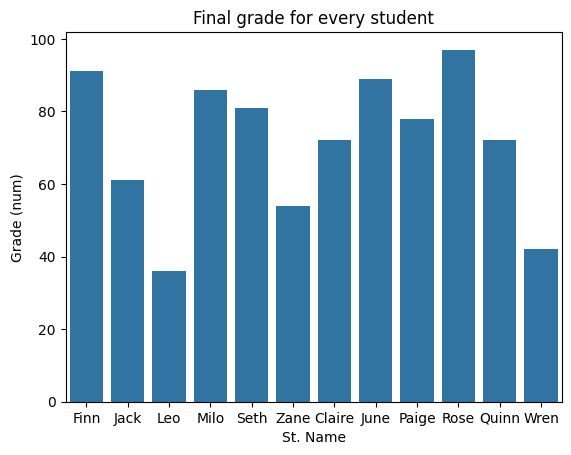

In [15]:
import seaborn as sns
sns.barplot(x = grades["Student"], y = grades["Grade"]).set(**{'title':"Final grade for every student", 'xlabel':"St. Name", 'ylabel':"Grade (num)"})


# Aggregation and Summarization

Data aggregation with pandas' `groupby` method allows grouping data based on one or more columns and then applying aggregate functions to summarize the data within each group. The groupby operation follows a split-apply-combine pattern: splitting the data into groups, applying aggregation functions like sum, mean, count, or custom functions, and then combining the results into a new summarized DataFrame. This technique is useful for analyzing patterns and trends across categories, such as calculating total sales by product or average scores by student. Multiple aggregation functions can be applied simultaneously to different columns, making groupby a versatile tool for data summarization in Python

In [10]:
average_grade_course = grades.groupby('Course')['Grade'].mean()
average_grade_course

,Grade
Course,
ADM,67.6
ECO,79.5
LAW,72.4


## Bar chart

Bar charts are used to compare numerical values across different categories visually, making it easy to spot patterns, trends, and differences at a glance. The command average_grade_course.plot(kind='bar') creates a vertical bar chart in pandas, where each bar shows the average grade for a course. It’s an easy way to compare values across categories visually. By default, the x-axis shows the categories, and the y-axis shows the values

<Axes: xlabel='Course'>

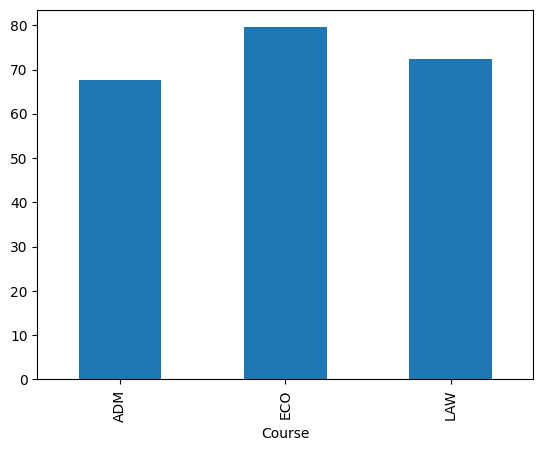

In [11]:
average_grade_course.plot(kind='bar')

When creating a bar chart with `seaborn.barplot`, the `hue` parameter adds another categorical dimension to the visualization. Instead of just showing one bar per category, it subdivides each main category into smaller bars based on the values in the `hue` column. This is useful for comparing how a numerical variable changes across different categories and subcategories simultaneously. For instance, in our `grades` DataFrame example, `sns.barplot(x=grades["Student"], y=grades["Grade"], hue=grades['Score'])` would show each student's grade, with the bars for each student further distinguished by their letter 'Score', allowing for a quick visual comparison of how grades are distributed across students and their corresponding letter scores.

[Text(0.5, 1.0, 'Final grade for every student'),
 Text(0.5, 0, 'St. Name'),
 Text(0, 0.5, 'Grade (num)')]

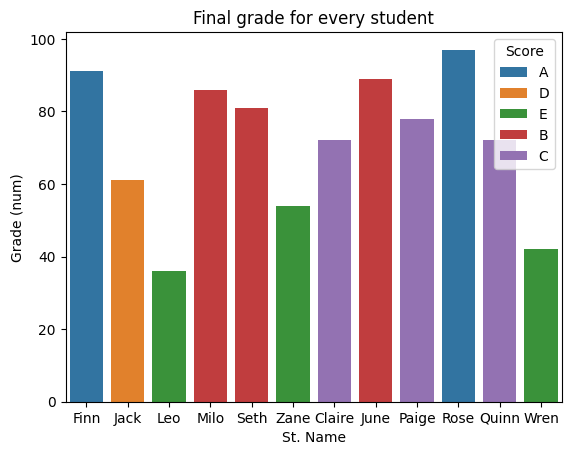

In [16]:
sns.barplot(x = grades["Student"], y = grades["Grade"],hue=grades['Score']).set(**{'title':"Final grade for every student", 'xlabel':"St. Name", 'ylabel':"Grade (num)"})


The code average_grade_course = `grades.groupby(['Course','Score'])['Grade'].count()` groups the grades DataFrame by both the 'Course' and 'Score' columns, then count it ('count') of the 'Grade' column for each group. The result is a Series with the grouped indices and their corresponding average grades. The `reset_index()` method then converts this Series back into a DataFrame, making the grouped columns into regular columns again, which is useful for further analysis or plotting

Course  Score
ADM     A        1
        C        2
        D        1
        E        1
ECO     B        1
        C        1
LAW     A        1
        B        2
        E        2
Name: Grade, dtype: int64
  Course Score  Grade
0    ADM     A      1
1    ADM     C      2
2    ADM     D      1
3    ADM     E      1
4    ECO     B      1
5    ECO     C      1
6    LAW     A      1
7    LAW     B      2
8    LAW     E      2


<Axes: xlabel='Course', ylabel='Grade'>

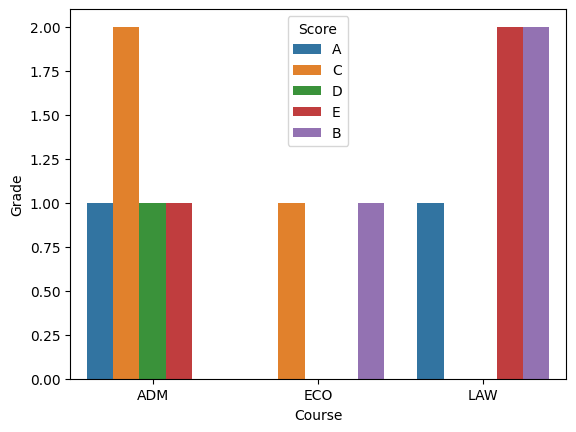

In [17]:
average_grade_course = grades.groupby(['Course','Score'])['Grade'].count()
print(average_grade_course)
average_grade_course = average_grade_course.reset_index()
print(average_grade_course)
sns.barplot(x=average_grade_course['Course'], y=average_grade_course['Grade'], hue=average_grade_course['Score'])

The code `import seaborn as sns` imports the Seaborn library for statistical data visualization in Python. The function call `sns.barplot(x=average_grade_course['Course'], y=average_grade_course['Grade'], hue=average_grade_course['Score'])` creates a bar plot where the x-axis shows course names, the y-axis shows grades, and the bars are further grouped and colored by the 'Score' categories using the hue parameter. This helps in comparing grades across courses with an additional categorical dimension for deeper insight.

<Axes: xlabel='Course', ylabel='Grade'>

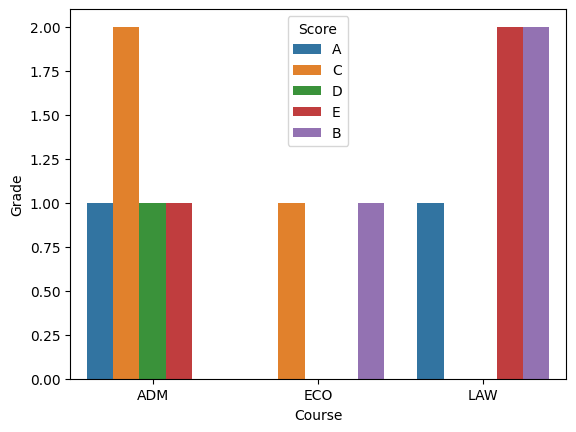

In [18]:
import seaborn as sns
sns.barplot(x=average_grade_course['Course'], y=average_grade_course['Grade'], hue=average_grade_course['Score'])